# Аналіз та порівняння методів обчислення показника Херста

Цей документ демонструє різні підходи до обчислення показника Херста для часових рядів за допомогою Python-модуля `hurst`.

## Зміст
1. [Вступ](#вступ)
2. [Імпорт необхідних бібліотек](#імпорт-необхідних-бібліотек)
3. [Генерація тестових даних](#генерація-тестових-даних)
4. [Функція для обчислення та візуалізації показника Херста](#функція-для-обчислення-та-візуалізації-показника-херста)
5. [Порівняння різних режимів обчислення](#порівняння-різних-режимів-обчислення)
6. [Порівняння різних методів генерації даних](#порівняння-різних-методів-генерації-даних)
7. [Висновки](#висновки)

## Вступ

Показник Херста (H) – це статистична міра, яка допомагає визначити характер часового ряду:
- H = 0.5 — Броунівський рух (випадкове блукання)
- 0.5 < H < 1.0 — персистентна поведінка (тренд зберігається)
- 0 < H < 0.5 — антиперсистентна поведінка (тренд змінюється)

Цей скрипт демонструє різні способи обчислення показника Херста та порівнює їх результати.

## Імпорт необхідних бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc, random_walk

У цьому блоці коду ми імпортуємо:
- `numpy` — для математичних операцій та роботи з масивами
- `matplotlib.pyplot` — для візуалізації результатів
- `compute_Hc` та `random_walk` — функції з модуля `hurst` для обчислення показника Херста та генерації випадкових блукань

## Генерація тестових даних

In [11]:
# Встановлюємо seed для відтворюваності результатів
np.random.seed(42)
# Генеруємо випадкові зміни з нормальним розподілом (невеликі відхилення)
random_changes = 1. + np.random.randn(99999) / 1000.
# Створюємо часовий ряд як кумулятивний добуток змін (імітація цінового ряду)
series = np.cumprod(random_changes)

У цьому блоці ми:
1. Встановлюємо фіксоване значення seed для генератора випадкових чисел, щоб результати були відтворюваними
2. Генеруємо 99999 випадкових змін з нормальним розподілом, масштабованих до невеликих значень (порядку 0.001)
3. Обчислюємо кумулятивний добуток цих змін, що імітує поведінку цінового ряду (наприклад, ціни на акції)

## Функція для обчислення та візуалізації показника Херста

In [12]:
def evaluate_hurst(series, kind, simplified=True):
    """
    Обчислює показник Херста для часового ряду та візуалізує результати R/S-аналізу
    
    Параметри:
    series — часовий ряд для аналізу
    kind — тип ряду ('price', 'change', 'random_walk')
    simplified — використовувати спрощений алгоритм обчислення
    """
    # Обчислюємо показник Херста, коефіцієнт c та дані для побудови графіка
    H, c, data = compute_Hc(series=series, kind=kind, simplified=simplified)
    
    # Створюємо графік
    f, ax = plt.subplots()
    # Додаємо лінію регресії
    ax.plot(data[0], c*data[0]**H, color="deepskyblue")
    # Додаємо точки спостережень
    ax.scatter(data[0], data[1], color="purple")
    # Встановлюємо логарифмічний масштаб для обох осей
    ax.set_xscale('log')
    ax.set_yscale('log')
    # Додаємо підписи осей
    ax.set_xlabel('Часовий інтервал')
    ax.set_ylabel('Відношення R/S')
    # Додаємо сітку для кращої читабельності
    ax.grid(True)
    # Відображаємо графік
    plt.show()
    # Виводимо результати обчислення
    print("H={:.4f}, c={:.4f}".format(H,c))

Ця функція:
1. Приймає часовий ряд, тип ряду та параметр спрощення алгоритму
2. Обчислює показник Херста та суміжні параметри за допомогою функції `compute_Hc`
3. Візуалізує результати у вигляді логарифмічного графіка R/S-аналізу
4. Виводить значення показника Херста (H) та коефіцієнта c

## Порівняння різних режимів обчислення

У цьому блоці ми аналізуємо один і той самий ряд даних, але з різними параметрами `kind`:
- `"price"` — інтерпретує дані як ціновий ряд (умовні ціни активу)
- `"change"` — інтерпретує дані як ряд змін (відносні зміни від періоду до періоду)
- `"random_walk"` — інтерпретує дані як випадкове блукання (кумулятивна сума змін)

Це порівняння показує, як різні інтерпретації вхідних даних впливають на результат обчислення показника Херста.

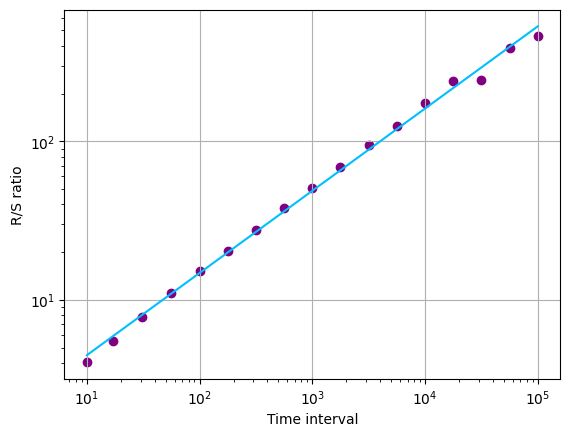

H=0.5183, c=1.3587


In [4]:
# Аналіз як цінового ряду (кумулятивний добуток змін)
evaluate_hurst(series=series, kind="price", simplified=True)

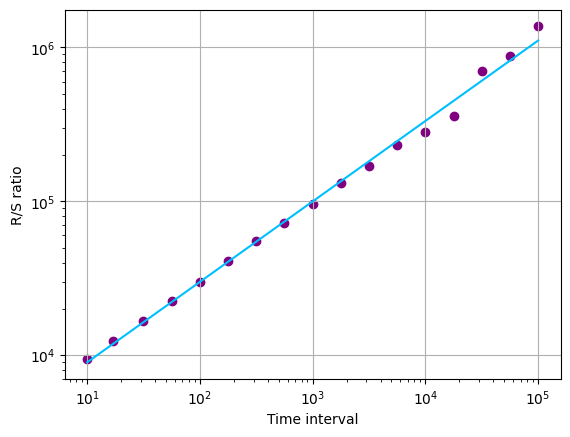

H=0.5228, c=2695.8487


In [5]:
# Аналіз як ряду змін
evaluate_hurst(series=series, kind="change", simplified=True)

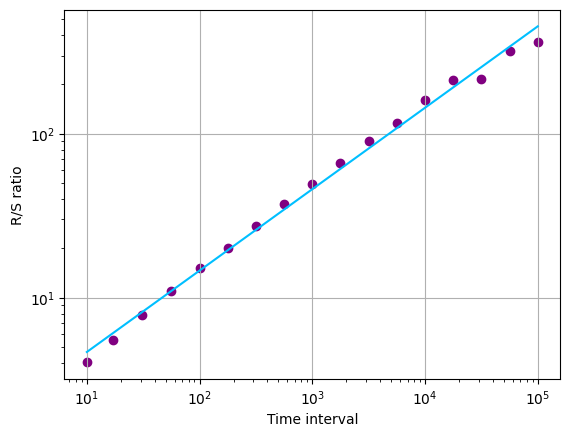

H=0.4968, c=1.4852


In [6]:
# Аналіз як випадкового блукання (кумулятивна сума змін)
evaluate_hurst(series=series, kind="random_walk", simplified=True)

## Порівняння різних методів генерації даних

In [13]:
# Генеруємо новий часовий ряд за допомогою функції random_walk
series_2 = random_walk(99999, cumprod=True)

## Аналізуємо новий ряд з різними параметрами `kind`

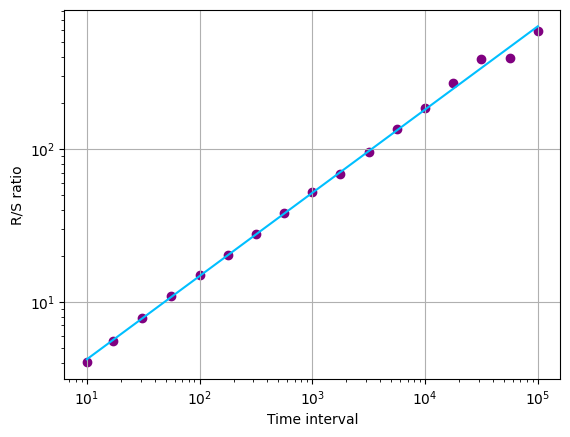

H=0.5448, c=1.1984


In [8]:
evaluate_hurst(series=series_2, kind="price", simplified=True)

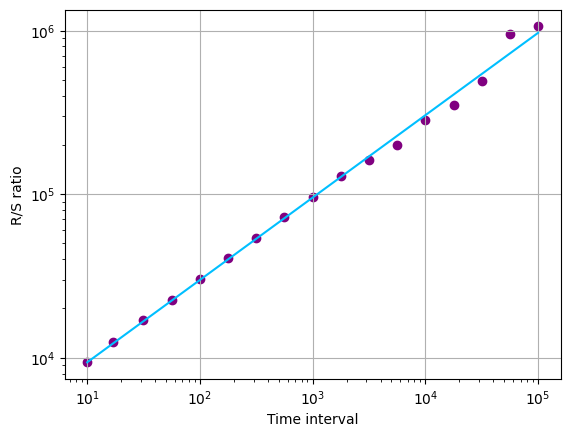

H=0.5038, c=2935.3111


In [9]:
evaluate_hurst(series=series_2, kind="change", simplified=True)

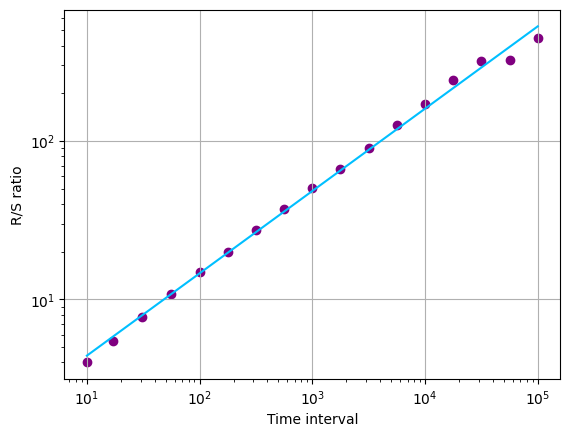

H=0.5199, c=1.3324


In [10]:
evaluate_hurst(series=series_2, kind="random_walk", simplified=True)

У цьому блоці ми:
1. Генеруємо новий часовий ряд за допомогою функції `random_walk` з пакету `hurst`
2. Параметр `cumprod=True` вказує, що ми хочемо отримати ряд як кумулятивний добуток змін
3. Аналізуємо цей новий ряд з тими ж параметрами `kind`, що й для першого ряду

Це дозволяє порівняти результати для двох різних методів генерації даних: власноруч (з використанням `np.cumprod` та `np.random.randn`) та за допомогою вбудованої функції `random_walk`.


## Висновки

Цей скрипт демонструє:
1. Різні підходи до обчислення показника Херста залежно від інтерпретації вхідних даних
2. Вплив методу генерації даних на результати аналізу
3. Візуалізацію R/S-аналізу для оцінки якості лінійної регресії

Залежно від контексту аналізу та природи даних, різні параметри можуть давати більш точні або інтерпретовані результати. Порівняння цих підходів допомагає обрати найбільш підходящий метод для конкретного випадку.
